In [2]:
library(ggplot2)
library(xtable)

In [4]:
nazare = read.csv("data/Nazare.csv")
jaws = read.csv("data/Jaws.csv")

In [21]:
print(xtable(summary(nazare)), file = "tables/summary_nazare.tex", compress = FALSE)
print(xtable(summary(jaws)), file = "tables/summary_jaws.tex", compress = FALSE)

Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file 'tables/summary_nazare.tex': No such file or directory”

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


In [17]:
time_between <- function (time, a, b) {
    h <- as.numeric(format(as.POSIXct(time), "%H"))
    (h >= a & h <= b)
}
nz2 <- subset(nazare, time_between(Time, 8, 17))
summary(nz2)

                  Time            Wave            Wind       
 2006-12-23 14:00:00:    1   Min.   :0.400   Min.   : 0.000  
 2006-12-23 17:00:00:    1   1st Qu.:1.600   1st Qu.: 5.000  
 2006-12-24 08:00:00:    1   Median :2.100   Median : 8.000  
 2006-12-24 11:00:00:    1   Mean   :2.406   Mean   : 8.844  
 2006-12-24 14:00:00:    1   3rd Qu.:3.000   3rd Qu.:12.000  
 2006-12-24 17:00:00:    1   Max.   :9.900   Max.   :38.000  
 (Other)            :17494   NA's   :284     NA's   :6       

Warning message:
“Removed 20 rows containing non-finite values (stat_qq).”Warning message:
“Removed 20 rows containing non-finite values (stat_qq_line).”

Warning message:
“Removed 20 rows containing non-finite values (stat_qq).”Warning message:
“Removed 20 rows containing non-finite values (stat_qq_line).”

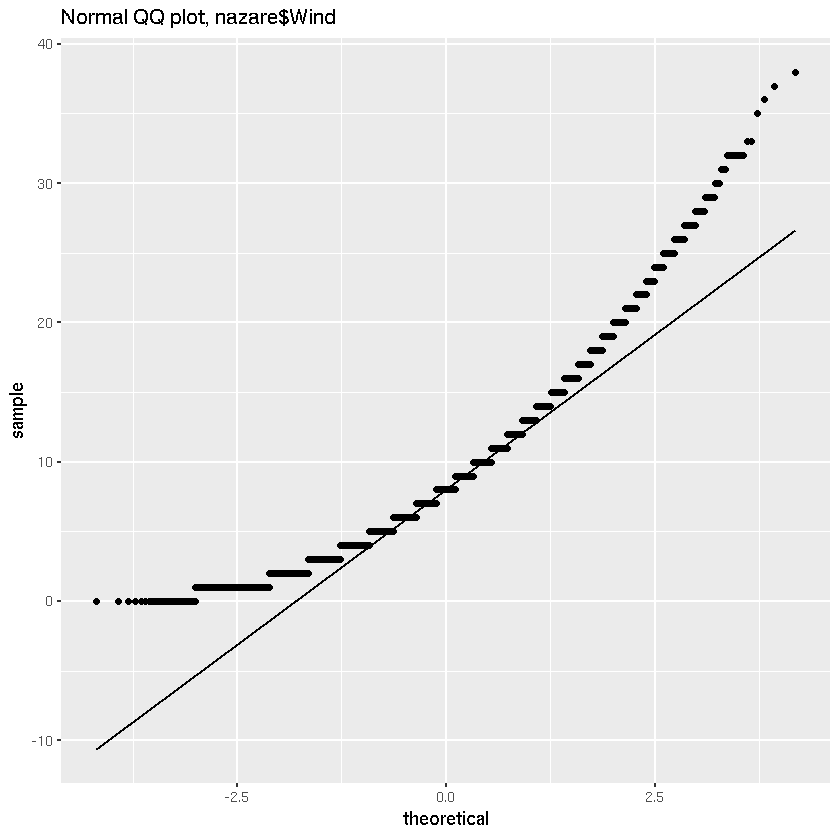

In [12]:
pl <- ggplot(nazare, aes(sample=Wind))
pl + stat_qq() + stat_qq_line() + labs(title="Normal QQ plot, nazare$Wind")
ggsave("figures/nazare_qq_wind.pdf", width=15, height=15, units='cm')

pl <- ggplot(nazare, aes(x=Wind))
pl + geom_histogram() + labs(title="Histogram nazare$Wind")
ggsave("figures/nazare_hist_wind.pdf", width=15, height=15, units='cm')

Warning message:
“Removed 544 rows containing non-finite values (stat_qq).”Warning message:
“Removed 544 rows containing non-finite values (stat_qq_line).”

Warning message:
“Removed 544 rows containing non-finite values (stat_qq).”Warning message:
“Removed 544 rows containing non-finite values (stat_qq_line).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 544 rows containing non-finite values (stat_bin).”

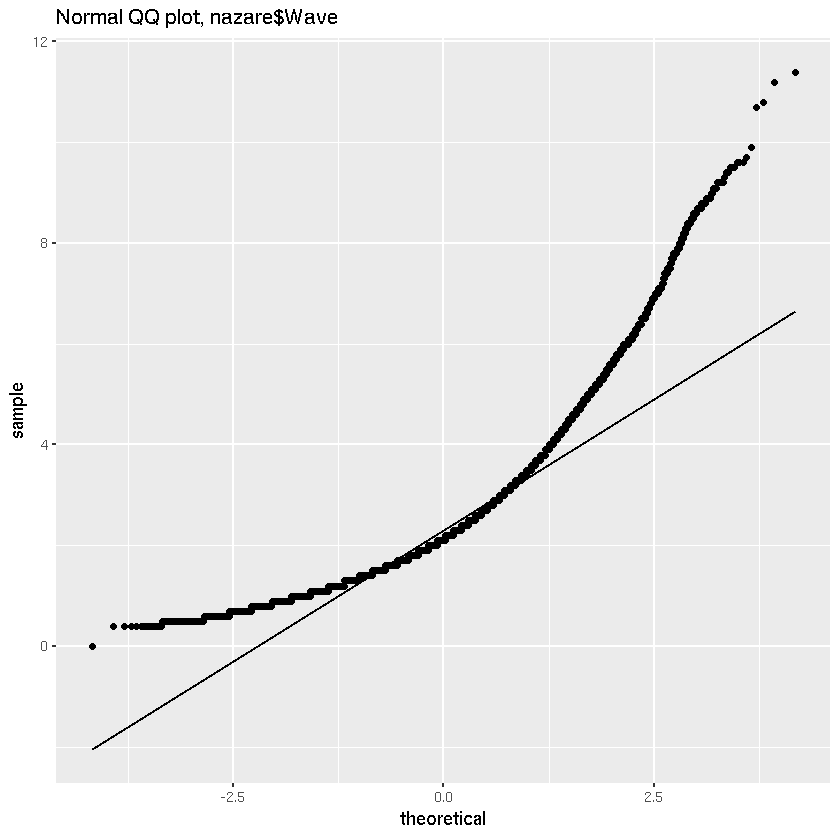

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 544 rows containing non-finite values (stat_bin).”

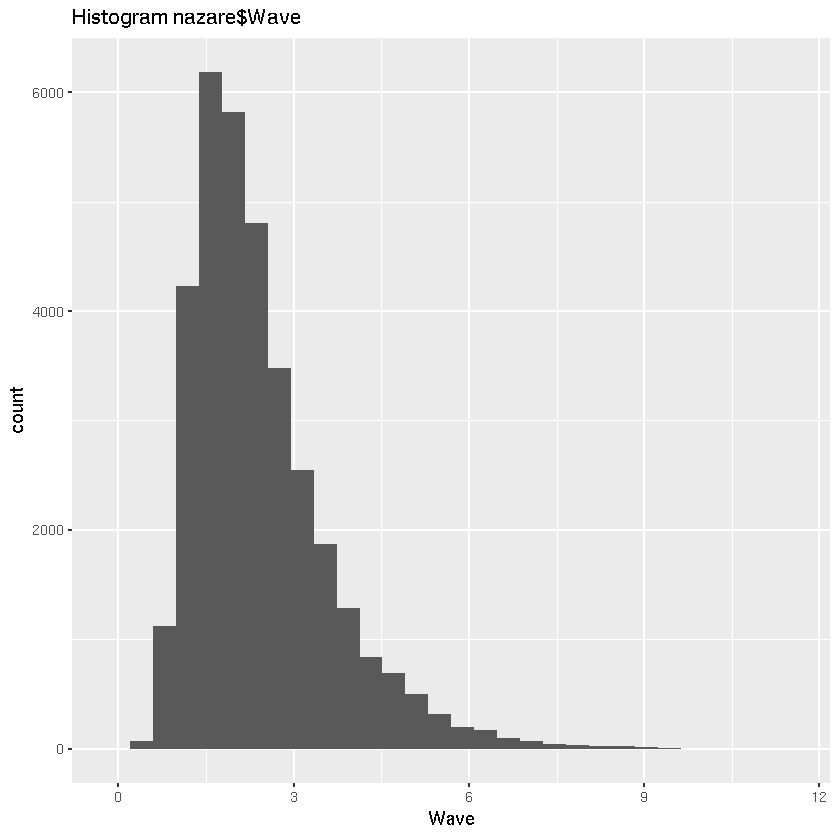

In [14]:
pl <- ggplot(nazare, aes(sample=Wave))
pl + stat_qq() + stat_qq_line() + labs(title="Normal QQ plot, nazare$Wave")
ggsave("figures/nazare_qq_wave.pdf", width=15, height=15, units='cm')

pl <- ggplot(nazare, aes(x=Wave))
pl + geom_histogram()  + labs(title="Histogram nazare$Wave")
ggsave("figures/nazare_hist_wave.pdf", width=15, height=15, units='cm')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


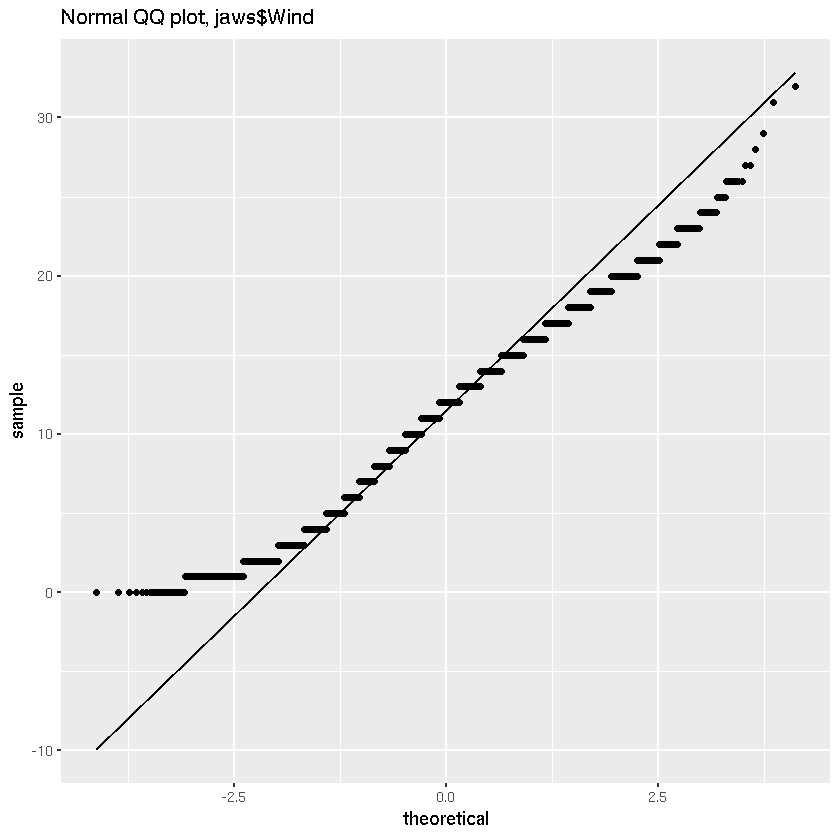

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


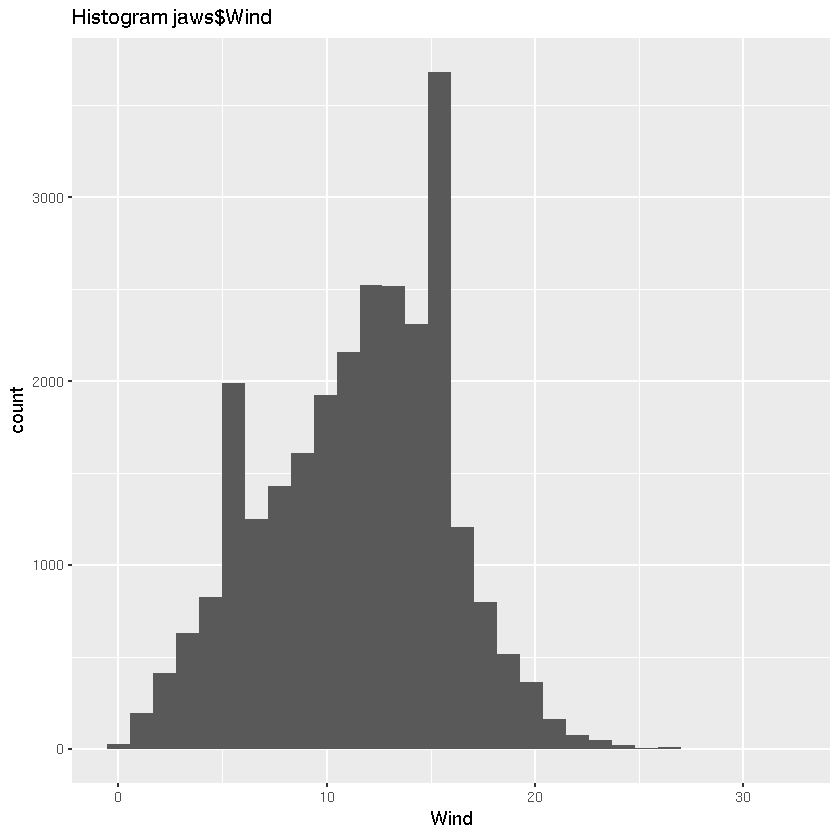

In [15]:
pl <- ggplot(jaws, aes(sample=Wind))
pl + stat_qq() + stat_qq_line() + labs(title="Normal QQ plot, jaws$Wind")
ggsave("figures/jaws_qq_wind.pdf", width=15, height=15, units='cm')

pl <- ggplot(jaws, aes(x=Wind))
pl + geom_histogram()  + labs(title="Histogram jaws$Wind")
ggsave("figures/jaws_hist_wind.pdf", width=15, height=15, units='cm')

Warning message:
“Removed 552 rows containing non-finite values (stat_qq).”Warning message:
“Removed 552 rows containing non-finite values (stat_qq_line).”

Warning message:
“Removed 552 rows containing non-finite values (stat_qq).”Warning message:
“Removed 552 rows containing non-finite values (stat_qq_line).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 552 rows containing non-finite values (stat_bin).”

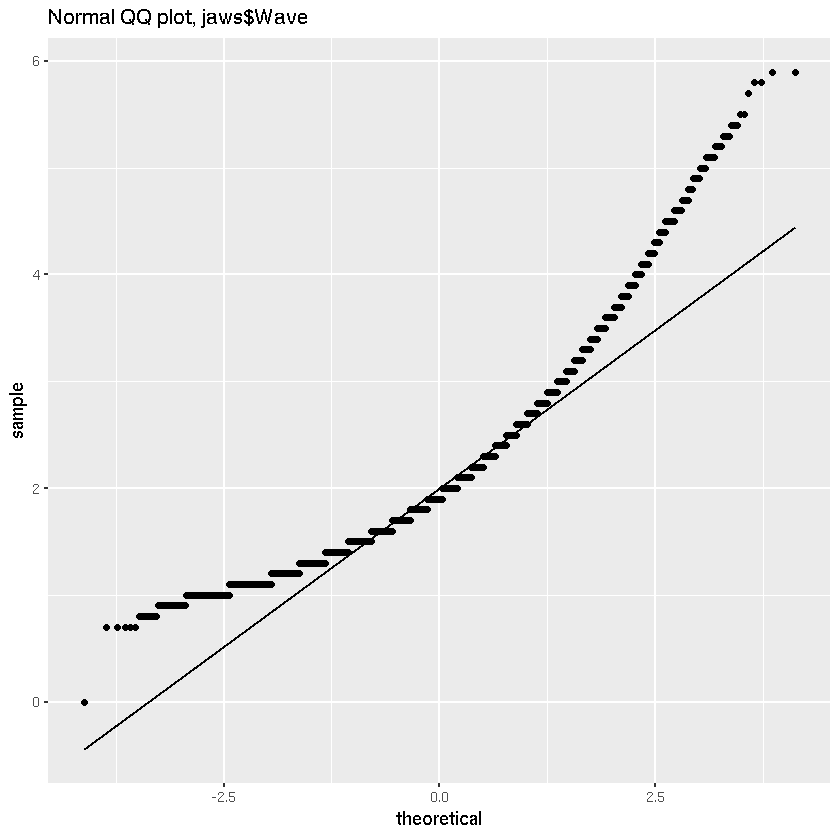

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 552 rows containing non-finite values (stat_bin).”

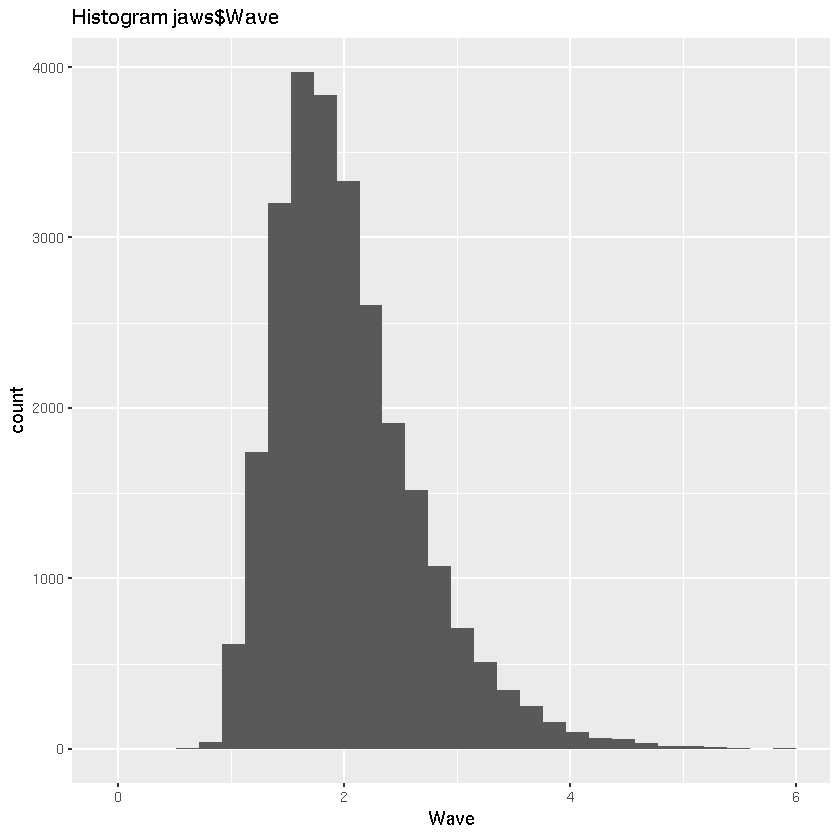

In [16]:
pl <- ggplot(jaws, aes(sample=Wave))
pl + stat_qq() + stat_qq_line() + labs(title="Normal QQ plot, jaws$Wave")
ggsave("figures/jaws_qq_wave.pdf", width=15, height=15, units='cm')

pl <- ggplot(jaws, aes(x=Wave))
pl + geom_histogram()  + labs(title="Histogram jaws$Wave")
ggsave("figures/jaws_hist_wave.pdf", width=15, height=15, units='cm')

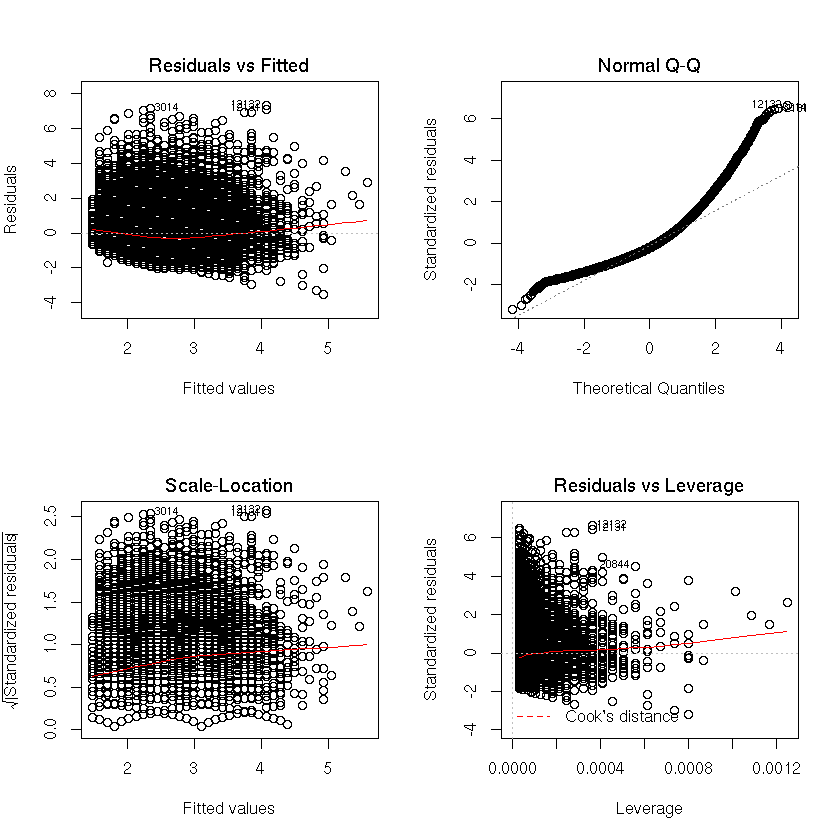

In [50]:
mylinreg = lm(Wave ~ Wind, data = nazare)
par(mfrow = c(2, 2))
plot(mylinreg)

# Plots

Warning message:
“Removed 564 rows containing non-finite values (stat_bin2d).”

Warning message:
“Removed 564 rows containing non-finite values (stat_bin2d).”

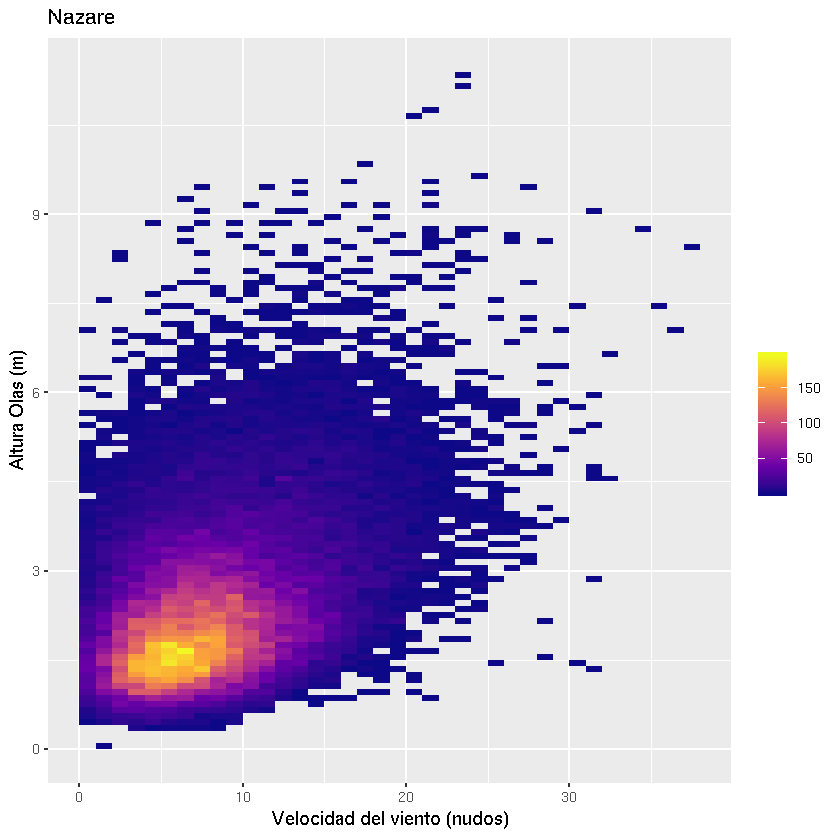

In [19]:
pl <- ggplot(nazare, aes(x=Wind, y=Wave)) 
#pl + geom_bin2d(bins=35)
#pl + geom_jitter()+ stat_density_2d() + geom_smooth(method=lm)
pl + geom_bin2d(binwidth=c(1,0.1)) + scale_fill_viridis_c("", option="plasma") +
  labs(title="Nazare", x="Velocidad del viento (nudos)",
       y = "Altura Olas (m)")

ggsave("figures/nazare.pdf", width=15, height=15, units='cm')

Warning message:
“Removed 552 rows containing non-finite values (stat_bin2d).”

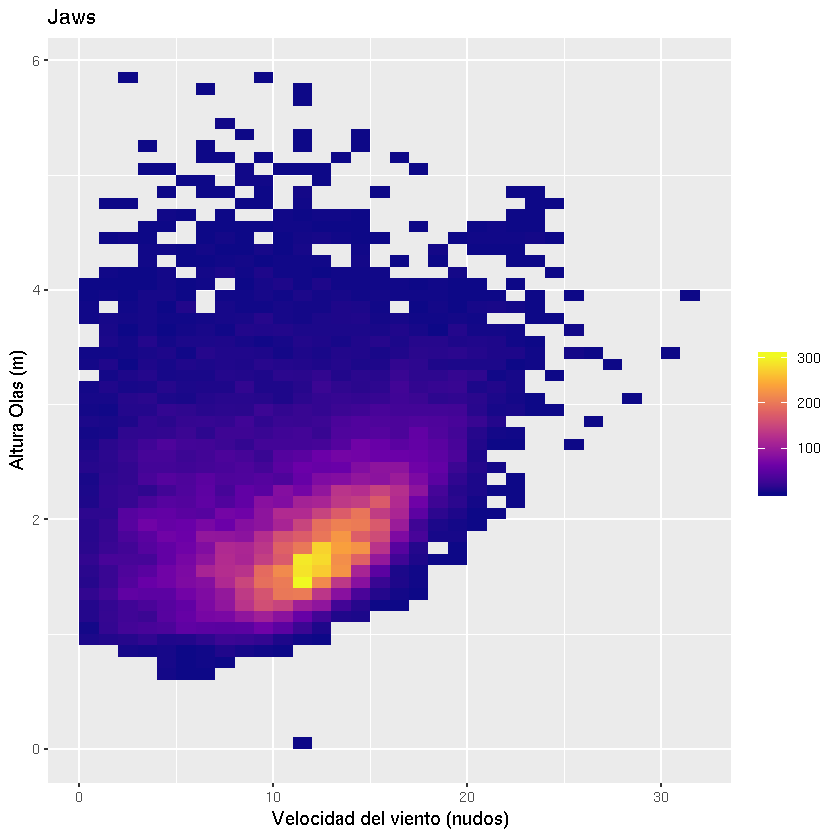

In [46]:
pl <- ggplot(jaws, aes(x=Wind, y=Wave)) 
#pl + geom_bin2d(bins=35)
#pl + geom_jitter()+ stat_density_2d() + geom_smooth(method=lm)
pl + geom_bin2d(binwidth=c(1,0.1)) + scale_fill_viridis_c("", option="plasma") +
  labs(title="Jaws", x="Velocidad del viento (nudos)",
       y = "Altura Olas (m)")

ggsave("figures/jaws.pdf", width=15, height=15, units='cm')